In [1]:
from sklearn.tree import DecisionTreeClassifier as DTC
from utilities import load_data, loss
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
x, y, _ = load_data()
x_train = x[:50_000]
y_train = y[:50_000]
x_test = x[50_000:]
y_test = y[50_000:]

In [3]:
para = { "max_depth":[None, 100, 200]}
dTree = GridSearchCV(
    estimator=DTC(random_state=0),
    param_grid=para,
    cv=10
)
dTree.fit(x_train, y_train)
print('best parameter:', dTree.best_params_)

best parameter: {'max_depth': None}


In [4]:
clf = DTC(random_state=0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [5]:
# training accuracy
print('training accuracy:', clf.score(x_train, y_train))
# test accuracy
print('test accuracy:', clf.score(x_test, y_test))

training accuracy: 1.0
test accuracy: 0.7212493685805691


In [6]:
print('The report of decision tree')
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
prob = clf.predict_proba(x_test)
print('log loss:', loss(y_test, prob, need_log=True))

The report of decision tree
              precision    recall  f1-score   support

           1       0.36      0.40      0.38       346
           2       0.71      0.71      0.71      3070
           3       0.47      0.51      0.49      1484
           4       0.43      0.43      0.43       495
           5       0.94      0.96      0.95       586
           6       0.90      0.89      0.89      2730
           7       0.53      0.45      0.48       554
           8       0.82      0.81      0.81      1650
           9       0.77      0.75      0.76       963

    accuracy                           0.72     11878
   macro avg       0.66      0.65      0.66     11878
weighted avg       0.72      0.72      0.72     11878

log loss: 8.98585867996654


No handles with labels found to put in legend.


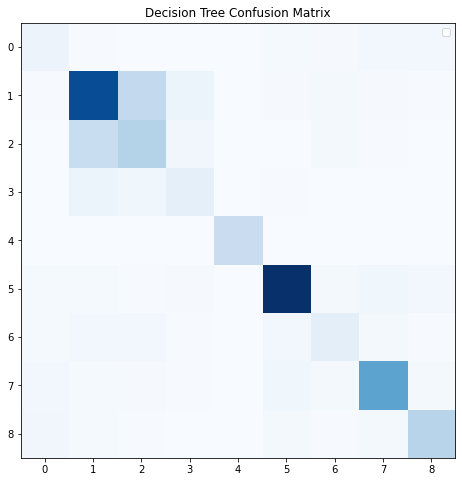

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
plt.title('Decision Tree Confusion Matrix')
plt.legend()
plt.imshow(cm, cmap=plt.cm.Blues)